In [335]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [336]:
pd.set_option("display.max_columns", None)

In [337]:
sns.set_style("whitegrid")

In [338]:
df = pd.read_csv("german_credit_data.csv")

In [339]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [340]:
df.shape

(1000, 11)

In [341]:
df["Age"].describe()

count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: Age, dtype: float64

In [342]:
df["Risk"].value_counts()

Risk
good    700
bad     300
Name: count, dtype: int64

In [343]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [344]:
df["Job"].unique()

array([2, 1, 3, 0])

In [345]:
df.duplicated().sum()

np.int64(0)

In [346]:
df.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

We have **1000 rows**, and missing values only in **Saving accounts (183 missing)** and **Checking account (394 missing)**.

* **183/1000 = 18.3% missing**
* **394/1000 = 39.4% missing**

So if we **drop rows**, we’d lose nearly **40% of our dataset** — which is not a good idea (since ML models need as much data as possible).

Since these are **categorical features** (likely "little", "moderate", "rich", etc.), we should **impute** rather than drop:

   * For categorical financial data, missingness often has meaning.
   * If someone didn’t declare a savings/checking account, it might indicate they **don’t have one** — which itself is an important risk factor.
   * So replacing with `"Unknown"` or `"No Account"` is reasonable.

In [347]:
df["Saving accounts"].unique()

array([nan, 'little', 'quite rich', 'rich', 'moderate'], dtype=object)

In [348]:
df["Checking account"].unique()

array(['little', 'moderate', nan, 'rich'], dtype=object)

In [349]:
df['Saving accounts'] = df['Saving accounts'].fillna('unknown')
df['Checking account'] = df['Checking account'].fillna('unknown')

In [350]:
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,unknown,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,unknown,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,unknown,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,unknown,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [351]:
df.drop(columns = "Unnamed: 0", inplace = True)

In [352]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

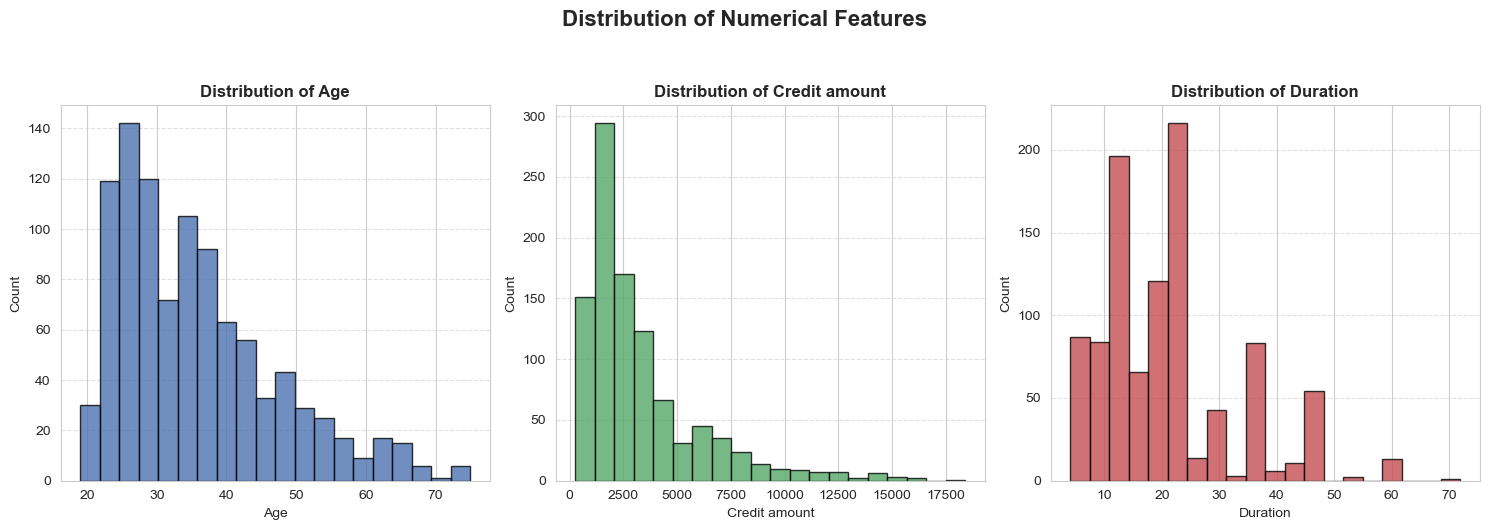

In [353]:
# Create subplots for each feature
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  

# Features to plot
features = ["Age", "Credit amount", "Duration"]
colors = ["#4C72B0", "#55A868", "#C44E52"]  # custom palette

for ax, feature, color in zip(axes, features, colors):
    ax.hist(df[feature], bins=20, edgecolor="black", color=color, alpha=0.8)
    ax.set_title(f"Distribution of {feature}", fontsize=12, fontweight="bold")
    ax.set_xlabel(feature, fontsize=10)
    ax.set_ylabel("Count", fontsize=10)
    ax.grid(axis="y", linestyle="--", alpha=0.6)

# Main title
fig.suptitle("Distribution of Numerical Features", fontsize=16, fontweight="bold", y=1.05)

plt.tight_layout()
plt.show()


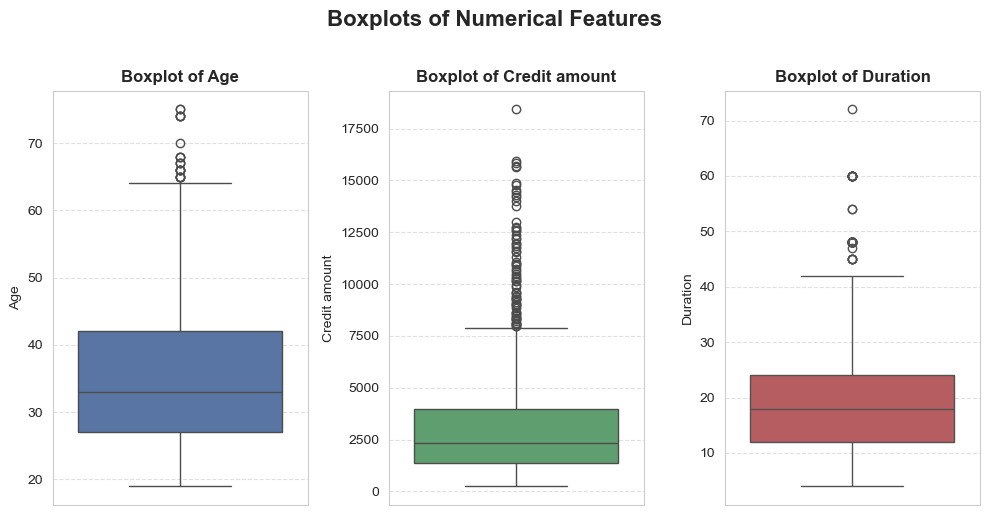

In [354]:
# Features to plot
features = ["Age", "Credit amount", "Duration"]
colors = ["#4C72B0", "#55A868", "#C44E52"]  # custom palette

plt.figure(figsize=(10, 5))  # wider layout

for i, (col, color) in enumerate(zip(features, colors)):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=df[col], color=color)
    plt.title(f"Boxplot of {col}", fontsize=12, fontweight="bold")
    plt.ylabel(col, fontsize=10)
    plt.grid(axis="y", linestyle="--", alpha=0.6)

# Main title
plt.suptitle("Boxplots of Numerical Features", fontsize=16, fontweight="bold", y=1.02)

plt.tight_layout()
plt.show()

In [355]:
df.query("Duration >= 60")

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
29,63,male,2,own,little,little,6836,60,business,bad
134,21,female,2,own,moderate,unknown,10144,60,radio/TV,good
255,27,male,1,own,unknown,moderate,7418,60,radio/TV,good
332,24,female,3,own,moderate,moderate,7408,60,car,bad
373,63,male,3,free,unknown,unknown,13756,60,car,good
374,60,female,3,free,moderate,moderate,14782,60,vacation/others,bad
616,27,male,3,free,unknown,moderate,9157,60,radio/TV,good
637,21,male,2,own,little,unknown,15653,60,radio/TV,good
672,42,male,3,own,little,unknown,10366,60,car,good
677,24,male,2,own,moderate,moderate,5595,72,radio/TV,bad


In [356]:
categorical_cols = ["Sex", "Job", "Housing", "Saving accounts", "Checking account", "Purpose"]

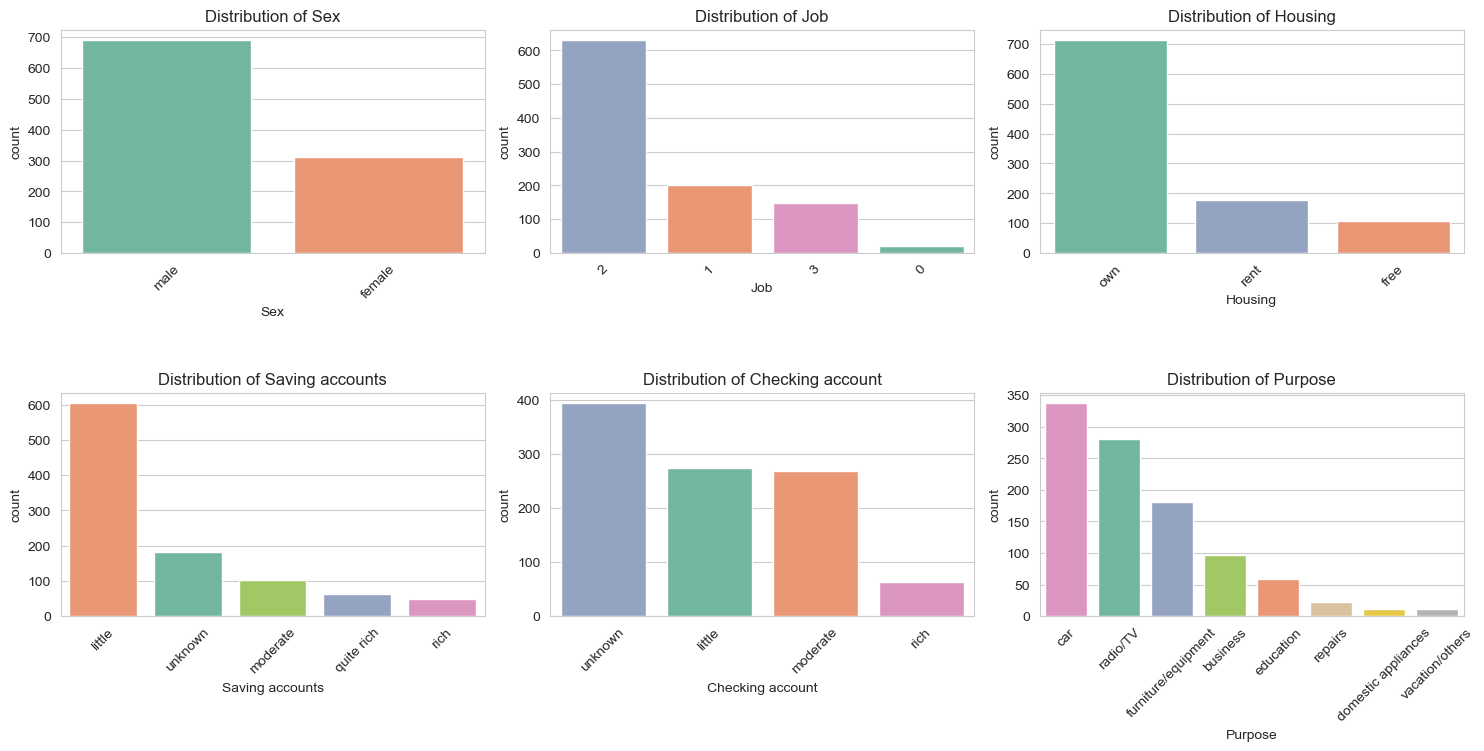

In [357]:
plt.figure(figsize=(15,10))

for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i+1)
    sns.countplot(
        data=df,
        x=col,
        hue=col, 
        order=df[col].value_counts().index,
        palette="Set2",
        legend=False
    )
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [358]:
corr = df[["Age", "Job", "Credit amount", "Duration"]].corr()
corr

,Age,Job,Credit amount,Duration
Age,1.000000,0.015673,0.032716,-0.036136
Job,0.015673,1.000000,0.285385,0.210910
Credit amount,0.032716,0.285385,1.000000,0.624984
Duration,-0.036136,0.210910,0.624984,1.000000


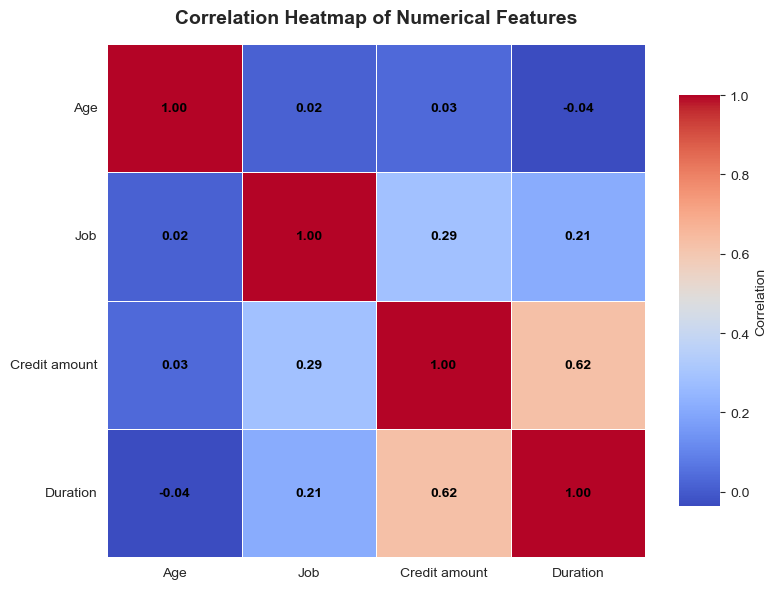

In [359]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",   
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8, "aspect": 10, "label": "Correlation"},
    annot_kws={"size": 10, "weight": "bold", "color": "black"} 
)

plt.title("Correlation Heatmap of Numerical Features", fontsize=14, fontweight="bold", pad=15)
plt.xticks(rotation=0)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

In [360]:
df.groupby("Job")["Credit amount"].mean()

Job
0    2745.136364
1    2358.520000
2    3070.965079
3    5435.493243
Name: Credit amount, dtype: float64

* This means that people with `Job = 3` tend to take **much larger loans/credit amounts** compared to other job categories.
* People with `Job = 1` request the **lowest average loan amount**.

In [361]:
df.groupby("Sex")["Credit amount"].mean()

Sex
female    2877.774194
male      3448.040580
Name: Credit amount, dtype: float64

In [362]:
pd.pivot_table(df, values = "Credit amount", index = "Housing", columns = "Purpose")

Purpose,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
Housing,,,,,,,,
free,4931.800000,5834.181818,NaN,4387.266667,4100.181818,2417.333333,2750.666667,7227.250
own,3800.592105,3329.949772,1546.5,2198.647059,3107.459016,2540.493392,2866.000000,8700.375
rent,5614.125000,3487.968254,1255.5,2931.000000,2727.354167,2199.763158,1522.000000,NaN


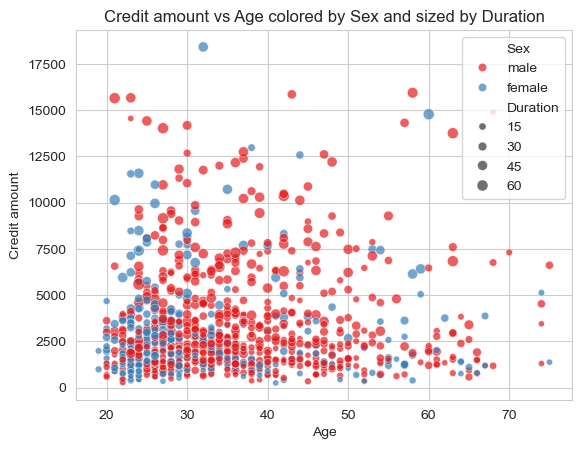

In [363]:
sns.scatterplot(data = df, x = "Age", y = "Credit amount", hue = "Sex", size = "Duration", alpha = 0.7, palette = "Set1")
plt.title("Credit amount vs Age colored by Sex and sized by Duration")
plt.show()

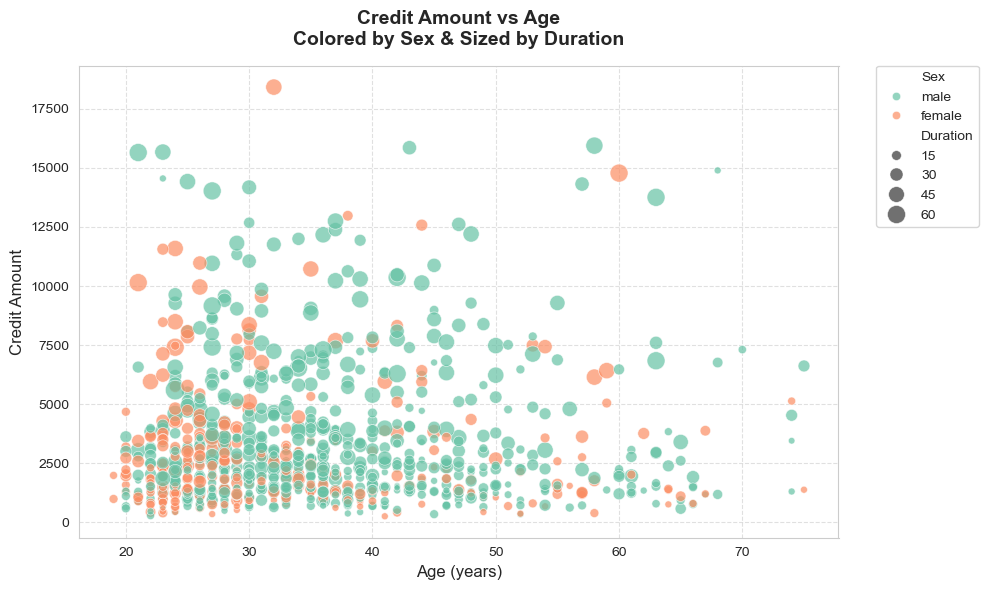

In [364]:
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=df,
    x="Age",
    y="Credit amount",
    hue="Sex",
    size="Duration",
    alpha=0.7,
    palette="Set2",
    sizes=(20, 200),  
    linewidth=0.5
)

plt.title("Credit Amount vs Age\nColored by Sex & Sized by Duration", fontsize=14, fontweight="bold", pad=15)
plt.xlabel("Age (years)", fontsize=12)
plt.ylabel("Credit Amount", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)

# Place legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0)

plt.tight_layout()
plt.show()

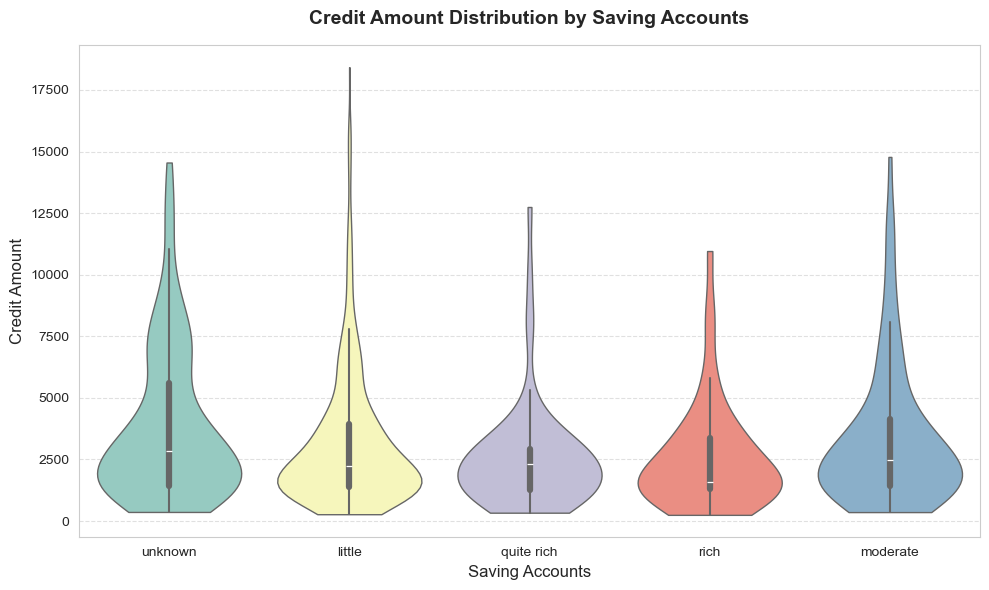

In [365]:
plt.figure(figsize=(10, 6))

sns.violinplot(
    data=df,
    x="Saving accounts",
    y="Credit amount",
    hue="Saving accounts",
    palette="Set3",        
    inner="box",            
    cut=0,                  
    linewidth=1
)

plt.title("Credit Amount Distribution by Saving Accounts", fontsize=14, fontweight="bold", pad=15)
plt.xlabel("Saving Accounts", fontsize=12)
plt.ylabel("Credit Amount", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

In [366]:
df["Risk"].value_counts(normalize = True)*100

Risk
good    70.0
bad     30.0
Name: proportion, dtype: float64

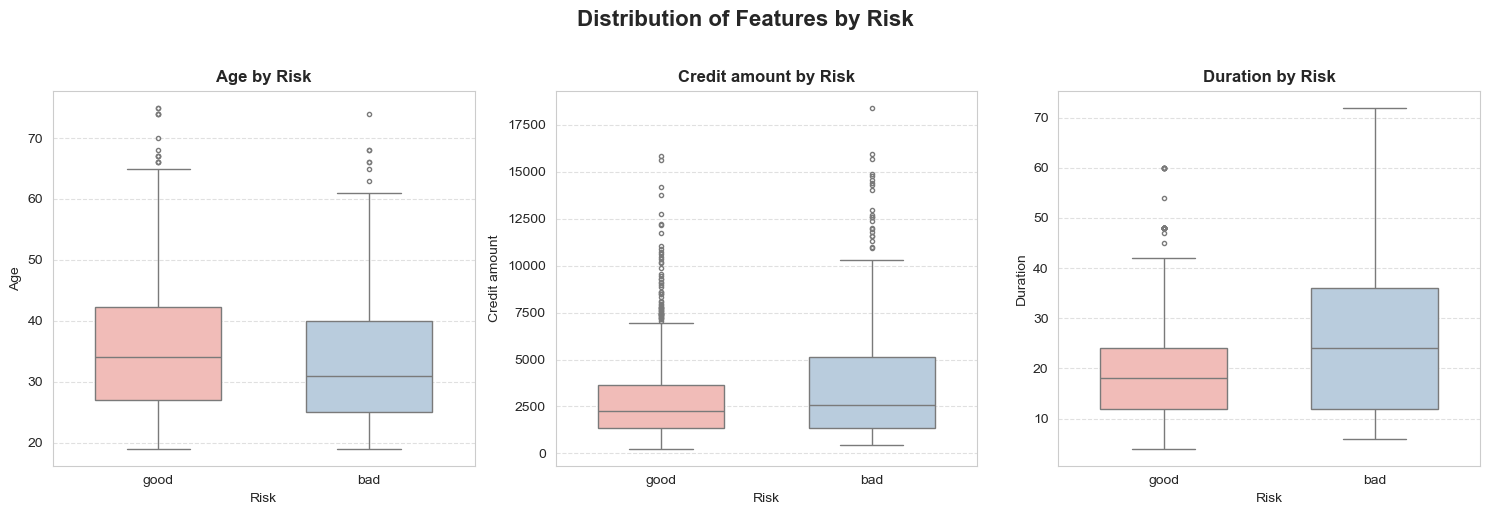

In [367]:
features = ["Age", "Credit amount", "Duration"]
colors = "Set2"  

plt.figure(figsize=(15, 5))

for i, col in enumerate(features):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(
        data=df,
        x="Risk",
        y=col,
        hue="Risk",       
        palette="Pastel1",
        dodge=False,       
        width=0.6,
        fliersize=3
    )
    plt.title(f"{col} by Risk", fontsize=12, fontweight="bold")
    plt.xlabel("Risk", fontsize=10)
    plt.ylabel(col, fontsize=10)
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    plt.legend([], [], frameon=False)  # remove redundant legend

# Main title
plt.suptitle("Distribution of Features by Risk", fontsize=16, fontweight="bold", y=1.02)

plt.tight_layout()
plt.show()

In [368]:
df.groupby("Risk")[["Age", "Credit amount", "Duration"]].mean()

,Age,Credit amount,Duration
Risk,,,
bad,33.963333,3938.126667,24.860000
good,36.224286,2985.457143,19.207143


1. **Age**

   * Customers with **bad credit risk** are **younger on average (33.9 years)**.
   * Customers with **good credit risk** are a bit **older (36.2 years)**.
      Younger customers may be slightly more prone to default (less financial stability/experience).

2. **Credit Amount**

   * **Bad risk** customers borrow **more on average (\~3938)**.
   * **Good risk** customers borrow **less (\~2985)**.
      Larger loans are correlated with higher risk of default.

3. **Duration**

   * **Bad risk** customers borrow for **longer terms (\~25 months)**.
   * **Good risk** customers borrow for **shorter terms (\~19 months)**.
      Longer repayment periods are riskier, possibly because more things can go wrong (job loss, income changes, etc.).

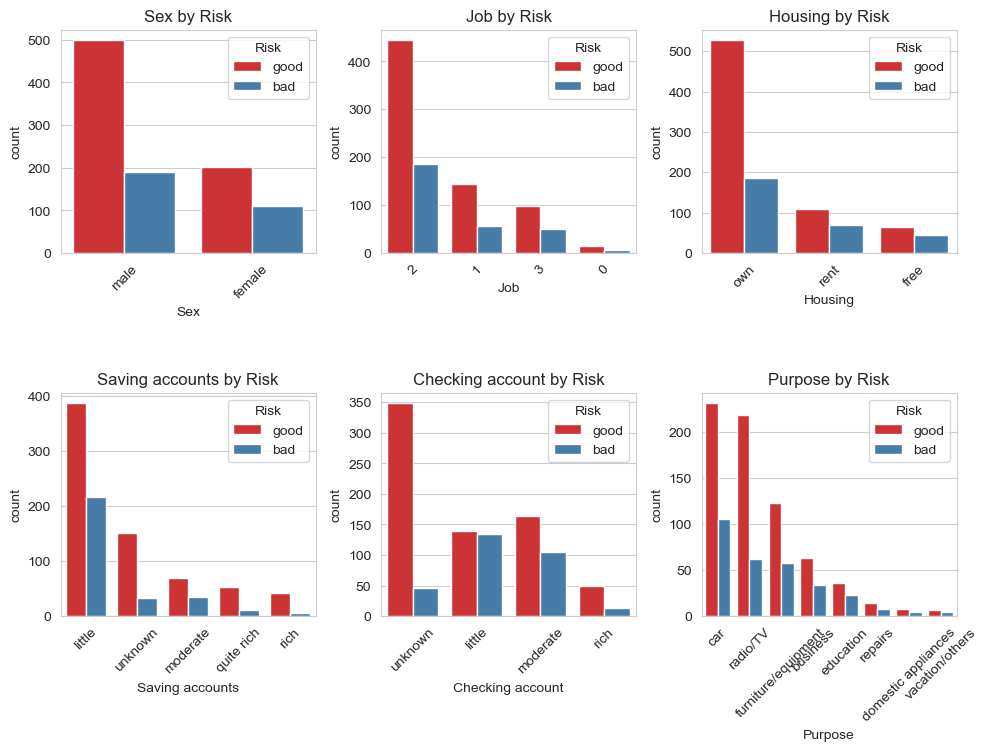

In [369]:
plt.figure(figsize = (10, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i+1)
    sns.countplot(data = df, x = col, hue = "Risk", palette = "Set1", order =  df[col].value_counts().index)
    plt.title(f"{col} by Risk")
    plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()

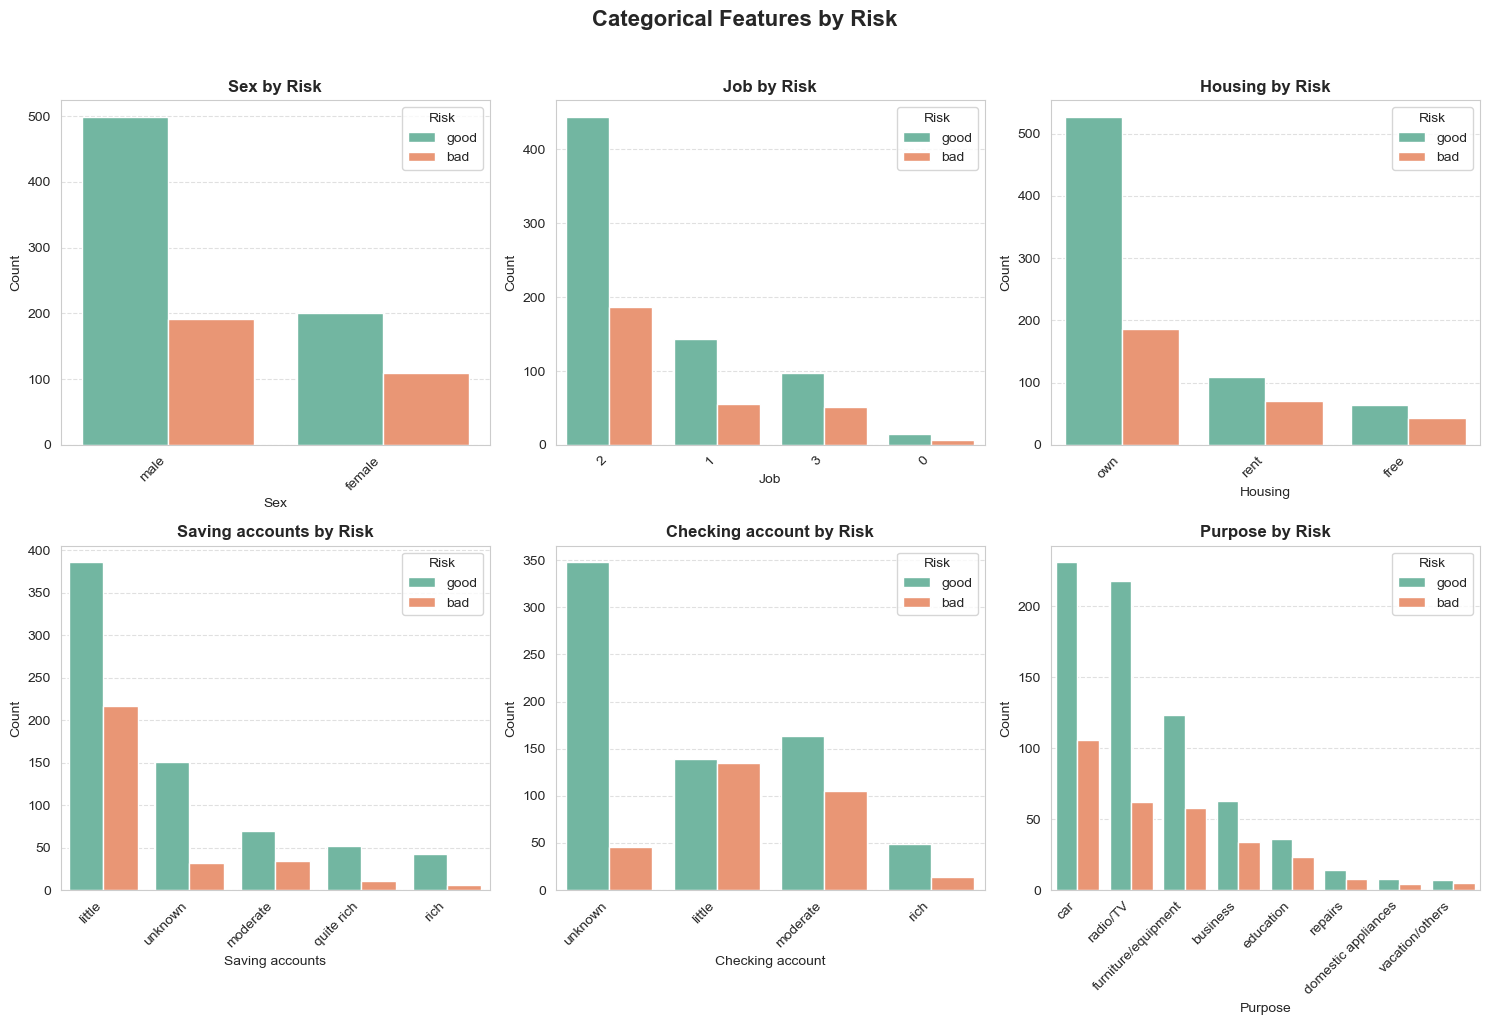

In [370]:
import math

n = len(categorical_cols)
rows = math.ceil(n / 3)  

plt.figure(figsize=(15, 5 * rows))  

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(rows, 3, i)
    sns.countplot(
        data=df,
        x=col,
        hue="Risk",
        palette="Set2",
        order=df[col].value_counts().index
    )
    plt.title(f"{col} by Risk", fontsize=12, fontweight="bold")
    plt.xlabel(col, fontsize=10)
    plt.ylabel("Count", fontsize=10)
    plt.xticks(rotation=45, ha="right")
    plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.suptitle("Categorical Features by Risk", fontsize=16, fontweight="bold", y=1.02)
plt.tight_layout()
plt.show()

In [371]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [372]:
features = ['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account','Credit amount', 'Duration']
target = 'Risk'

In [373]:
df_model = df[features + [target]].copy()

In [374]:
df_model.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
0,67,male,2,own,unknown,little,1169,6,good
1,22,female,2,own,little,moderate,5951,48,bad
2,49,male,1,own,little,unknown,2096,12,good
3,45,male,2,free,little,little,7882,42,good
4,53,male,2,free,little,little,4870,24,bad


In [375]:
from sklearn.preprocessing import LabelEncoder
import joblib

In [376]:
cat_cols = df_model.select_dtypes(include = 'object').columns.drop("Risk")

In [377]:
le_dict = {}

In [378]:
cat_cols

Index(['Sex', 'Housing', 'Saving accounts', 'Checking account'], dtype='object')

In [379]:
for col in cat_cols:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    le_dict[col] = le
    joblib.dump(le, f"{col}_encoder.pkl")

In [380]:
le_target = LabelEncoder()

In [381]:
df_model[target] = le_target.fit_transform(df_model[target])

In [382]:
df_model[target].value_counts()

Risk
1    700
0    300
Name: count, dtype: int64

In [383]:
joblib.dump(le_target, "target_encoder.pkl")

['target_encoder.pkl']

In [384]:
df_model.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
0,67,1,2,1,4,0,1169,6,1
1,22,0,2,1,0,1,5951,48,0
2,49,1,1,1,0,3,2096,12,1
3,45,1,2,0,0,0,7882,42,1
4,53,1,2,0,0,0,4870,24,0


In [385]:
from sklearn.model_selection import train_test_split

In [386]:
X = df_model.drop(target, axis = 1)

In [387]:
y = df_model[target]

In [388]:
X

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration
0,67,1,2,1,4,0,1169,6
1,22,0,2,1,0,1,5951,48
2,49,1,1,1,0,3,2096,12
3,45,1,2,0,0,0,7882,42
4,53,1,2,0,0,0,4870,24
...,...,...,...,...,...,...,...,...
995,31,0,1,1,0,3,1736,12
996,40,1,3,1,0,0,3857,30
997,38,1,2,1,0,3,804,12
998,23,1,2,0,0,0,1845,45


In [389]:
y

0      1
1      0
2      1
3      1
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: Risk, Length: 1000, dtype: int64

In [390]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [391]:
X_train.shape

(800, 8)

In [392]:
X_test.shape

(200, 8)

In [393]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [394]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [395]:
def train_model(model, param_grid, X_train, X_test, y_train, y_test):
    grid = GridSearchCV(model, param_grid, cv = 5, scoring = 'accuracy', n_jobs = -1)
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    return best_model, acc, grid.best_params_

In [396]:
dt = DecisionTreeClassifier(random_state = 42, class_weight = 'balanced')
dt_param_grid = {
    "max_depth" : [3, 5, 7, 10, None],
    "min_samples_split" : [2, 5, 10],
    "min_samples_leaf" : [1, 2, 4]
}

In [397]:
best_dt, acc_dt, params_dt = train_model(dt, dt_param_grid, X_train, X_test, y_train, y_test)

In [398]:
print('Decision Tree Accuracy:', acc_dt)

Decision Tree Accuracy: 0.665


In [399]:
print('Best parameters', params_dt)

Best parameters {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [400]:
rf = RandomForestClassifier(random_state = 42, class_weight = 'balanced', n_jobs = -1)

In [401]:
rf_param_grid = {
    "n_estimators" : [100, 150, 200],
    "max_depth" : [5, 7, 10, None],
    "min_samples_split" : [2, 5, 10],
    "min_samples_leaf" : [1, 2, 4]
}

In [402]:
best_rf, acc_rf, params_rf = train_model(rf, rf_param_grid, X_train, X_test, y_train, y_test)

In [403]:
print('Random Tree Accuracy:', acc_rf)

Random Tree Accuracy: 0.735


In [404]:
print('Best parameters', params_rf)

Best parameters {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [405]:
et = ExtraTreesClassifier(random_state = 42, class_weight = 'balanced', n_jobs = -1)

In [406]:
et_param_grid = {
    "n_estimators" : [100, 150, 200],
    "max_depth" : [5, 7, 10, None],
    "min_samples_split" : [2, 5, 10],
    "min_samples_leaf" : [1, 2, 4]
}

In [407]:
best_et, acc_et, params_et = train_model(et, et_param_grid, X_train, X_test, y_train, y_test)

In [408]:
print('Random Tree Accuracy:', acc_et)

Random Tree Accuracy: 0.715


In [409]:
print('Best parameters', params_et)

Best parameters {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [410]:
xgb = XGBClassifier(random_state = 42, scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum(), eval_metric = 'logloss')

In [411]:
xgb_param_grid = {
    "n_estimators" : [100, 150, 200],
    "max_depth" : [3, 5, 7],
    "learning_rate" : [0.01, 0.1, 0.2, 0.5],
    "subsample" : [0.5, 0.7, 1],
    "colsample_bytree" : [0.5, 0.7, 1]
}

In [412]:
best_xgb, acc_xgb, params_xgb = train_model(xgb, xgb_param_grid, X_train, X_test, y_train, y_test)

In [413]:
print('XGB Accuracy:', acc_xgb)

XGB Accuracy: 0.735


In [414]:
print('Best parameters', params_xgb)

Best parameters {'colsample_bytree': 0.7, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.7}


In [415]:
best_xgb.predict(X_test)

array([1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0])

In [416]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# Predictions
y_pred_rf = best_rf.predict(X_test)
y_pred_xgb = best_xgb.predict(X_test)

# Probabilities (needed for ROC-AUC)
y_prob_rf = best_rf.predict_proba(X_test)[:, 1]
y_prob_xgb = best_xgb.predict_proba(X_test)[:, 1]

# Print Accuracy
print("Random Forest Accuracy:", acc_rf)
print("XGBoost Accuracy:", acc_xgb)

# Print Classification Reports
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))

Random Forest Accuracy: 0.735
XGBoost Accuracy: 0.735

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.72      0.62        60
           1       0.86      0.74      0.80       140

    accuracy                           0.73       200
   macro avg       0.70      0.73      0.71       200
weighted avg       0.76      0.73      0.74       200

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.58      0.57        60
           1       0.82      0.80      0.81       140

    accuracy                           0.73       200
   macro avg       0.69      0.69      0.69       200
weighted avg       0.74      0.73      0.74       200



In [417]:
# Confusion Matrices
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nXGBoost Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

# ROC-AUC Scores
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
roc_auc_xgb = roc_auc_score(y_test, y_prob_xgb)
print("\nRandom Forest ROC-AUC:", roc_auc_rf)
print("XGBoost ROC-AUC:", roc_auc_xgb)

Random Forest Confusion Matrix:
 [[ 43  17]
 [ 36 104]]

XGBoost Confusion Matrix:
 [[ 35  25]
 [ 28 112]]

Random Forest ROC-AUC: 0.7714285714285714
XGBoost ROC-AUC: 0.7525


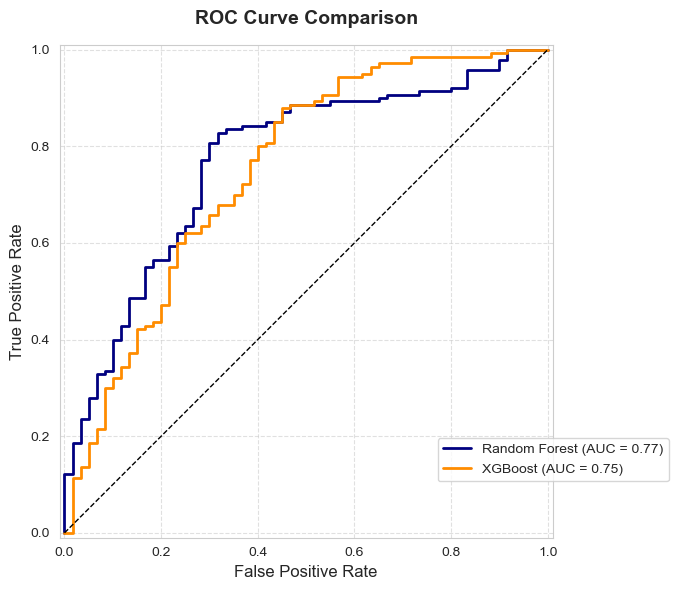

In [418]:
plt.figure(figsize=(8, 6))

# Plot ROC curves
RocCurveDisplay.from_estimator(
    best_rf, X_test, y_test,
    name="Random Forest",
    ax=plt.gca(),
    color="navy",
    linewidth=2
)
RocCurveDisplay.from_estimator(
    best_xgb, X_test, y_test,
    name="XGBoost",
    ax=plt.gca(),
    color="darkorange",
    linewidth=2
)

# Reference diagonal
plt.plot([0, 1], [0, 1], "k--", linewidth=1)

# Titles and labels
plt.title("ROC Curve Comparison", fontsize=14, fontweight="bold", pad=15)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.grid(linestyle="--", alpha=0.6)

# Legend outside
plt.legend(loc="lower right", bbox_to_anchor=(1.25, 0.1), frameon=True)

plt.tight_layout()
plt.show()

🔎 **Observations** 

* Both Random Forest and XGBoost achieved the same accuracy of **73.5%**, so further comparison was based on precision, recall, F1-score, confusion matrix, and ROC-AUC.
* **Random Forest** showed stronger performance in identifying **good loans** with higher recall (72% vs 58% in XGBoost), meaning it reduces the risk of wrongly rejecting customers with low credit risk.
* **XGBoost**, on the other hand, performed slightly better in detecting **bad loans**, achieving higher recall for the minority class (80% vs 74% in Random Forest).
* The **ROC-AUC score** was slightly higher for Random Forest (0.77 vs 0.75), indicating better overall ability to separate good and bad credit risks.
* Considering the project objective of ensuring **balanced performance and model stability**, Random Forest was selected as the preferred model since it provides reliable classification across both classes while maintaining strong overall discriminative power.

In [419]:
joblib.dump(best_rf, "random_forest_credit_model.pkl")

['random_forest_credit_model.pkl']